# Mass-Loss H-R Diagram

Figure 1.11 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

An H-R diagram showing stars with reasonably well determined mass loss rates. Data from
Cranmer & Saar 2011 [ApJ, 741, 54](https://ui.adsabs.harvard.edu/abs/2011ApJ...741...54C)


In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig1_11.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

Data derived from Cranmer & Saar 2011 [ApJ, 741, 54](https://ui.adsabs.harvard.edu/abs/2011ApJ...741...54C) and
references therein.  We'll color code by mass-loss range


Color coding (units: M-dot in M<sub>sun</sub>/year)
 * White: log Mdot <−6 
 * Light gray:−6<log Mdot <−3
 * Dark gray:−3<log Mdot <0
 * Black: log Mdot >0
 

In [3]:
dataFile = 'Cranmer_Saar_2011.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
Teff = np.array(data['Teff'])
L = 10.0**np.array(data['logL'])
logMdot = np.array(data['logMdot'])

# build a color array for each point

mCol = []
for i in range(len(Teff)):
    if logMdot[i] <= -6.0:
        mCol.append('white')
    elif logMdot[i] >= 0.0:
        mCol.append('black')
    elif logMdot[i] > -6.0 and logMdot[i] <= -3.0:
        mCol.append('#bfbfbf')
    else:
        mCol.append('#808080')

## Figure 1.11

Plot log Teff vs log L/Lsun, color each point by M-dot range

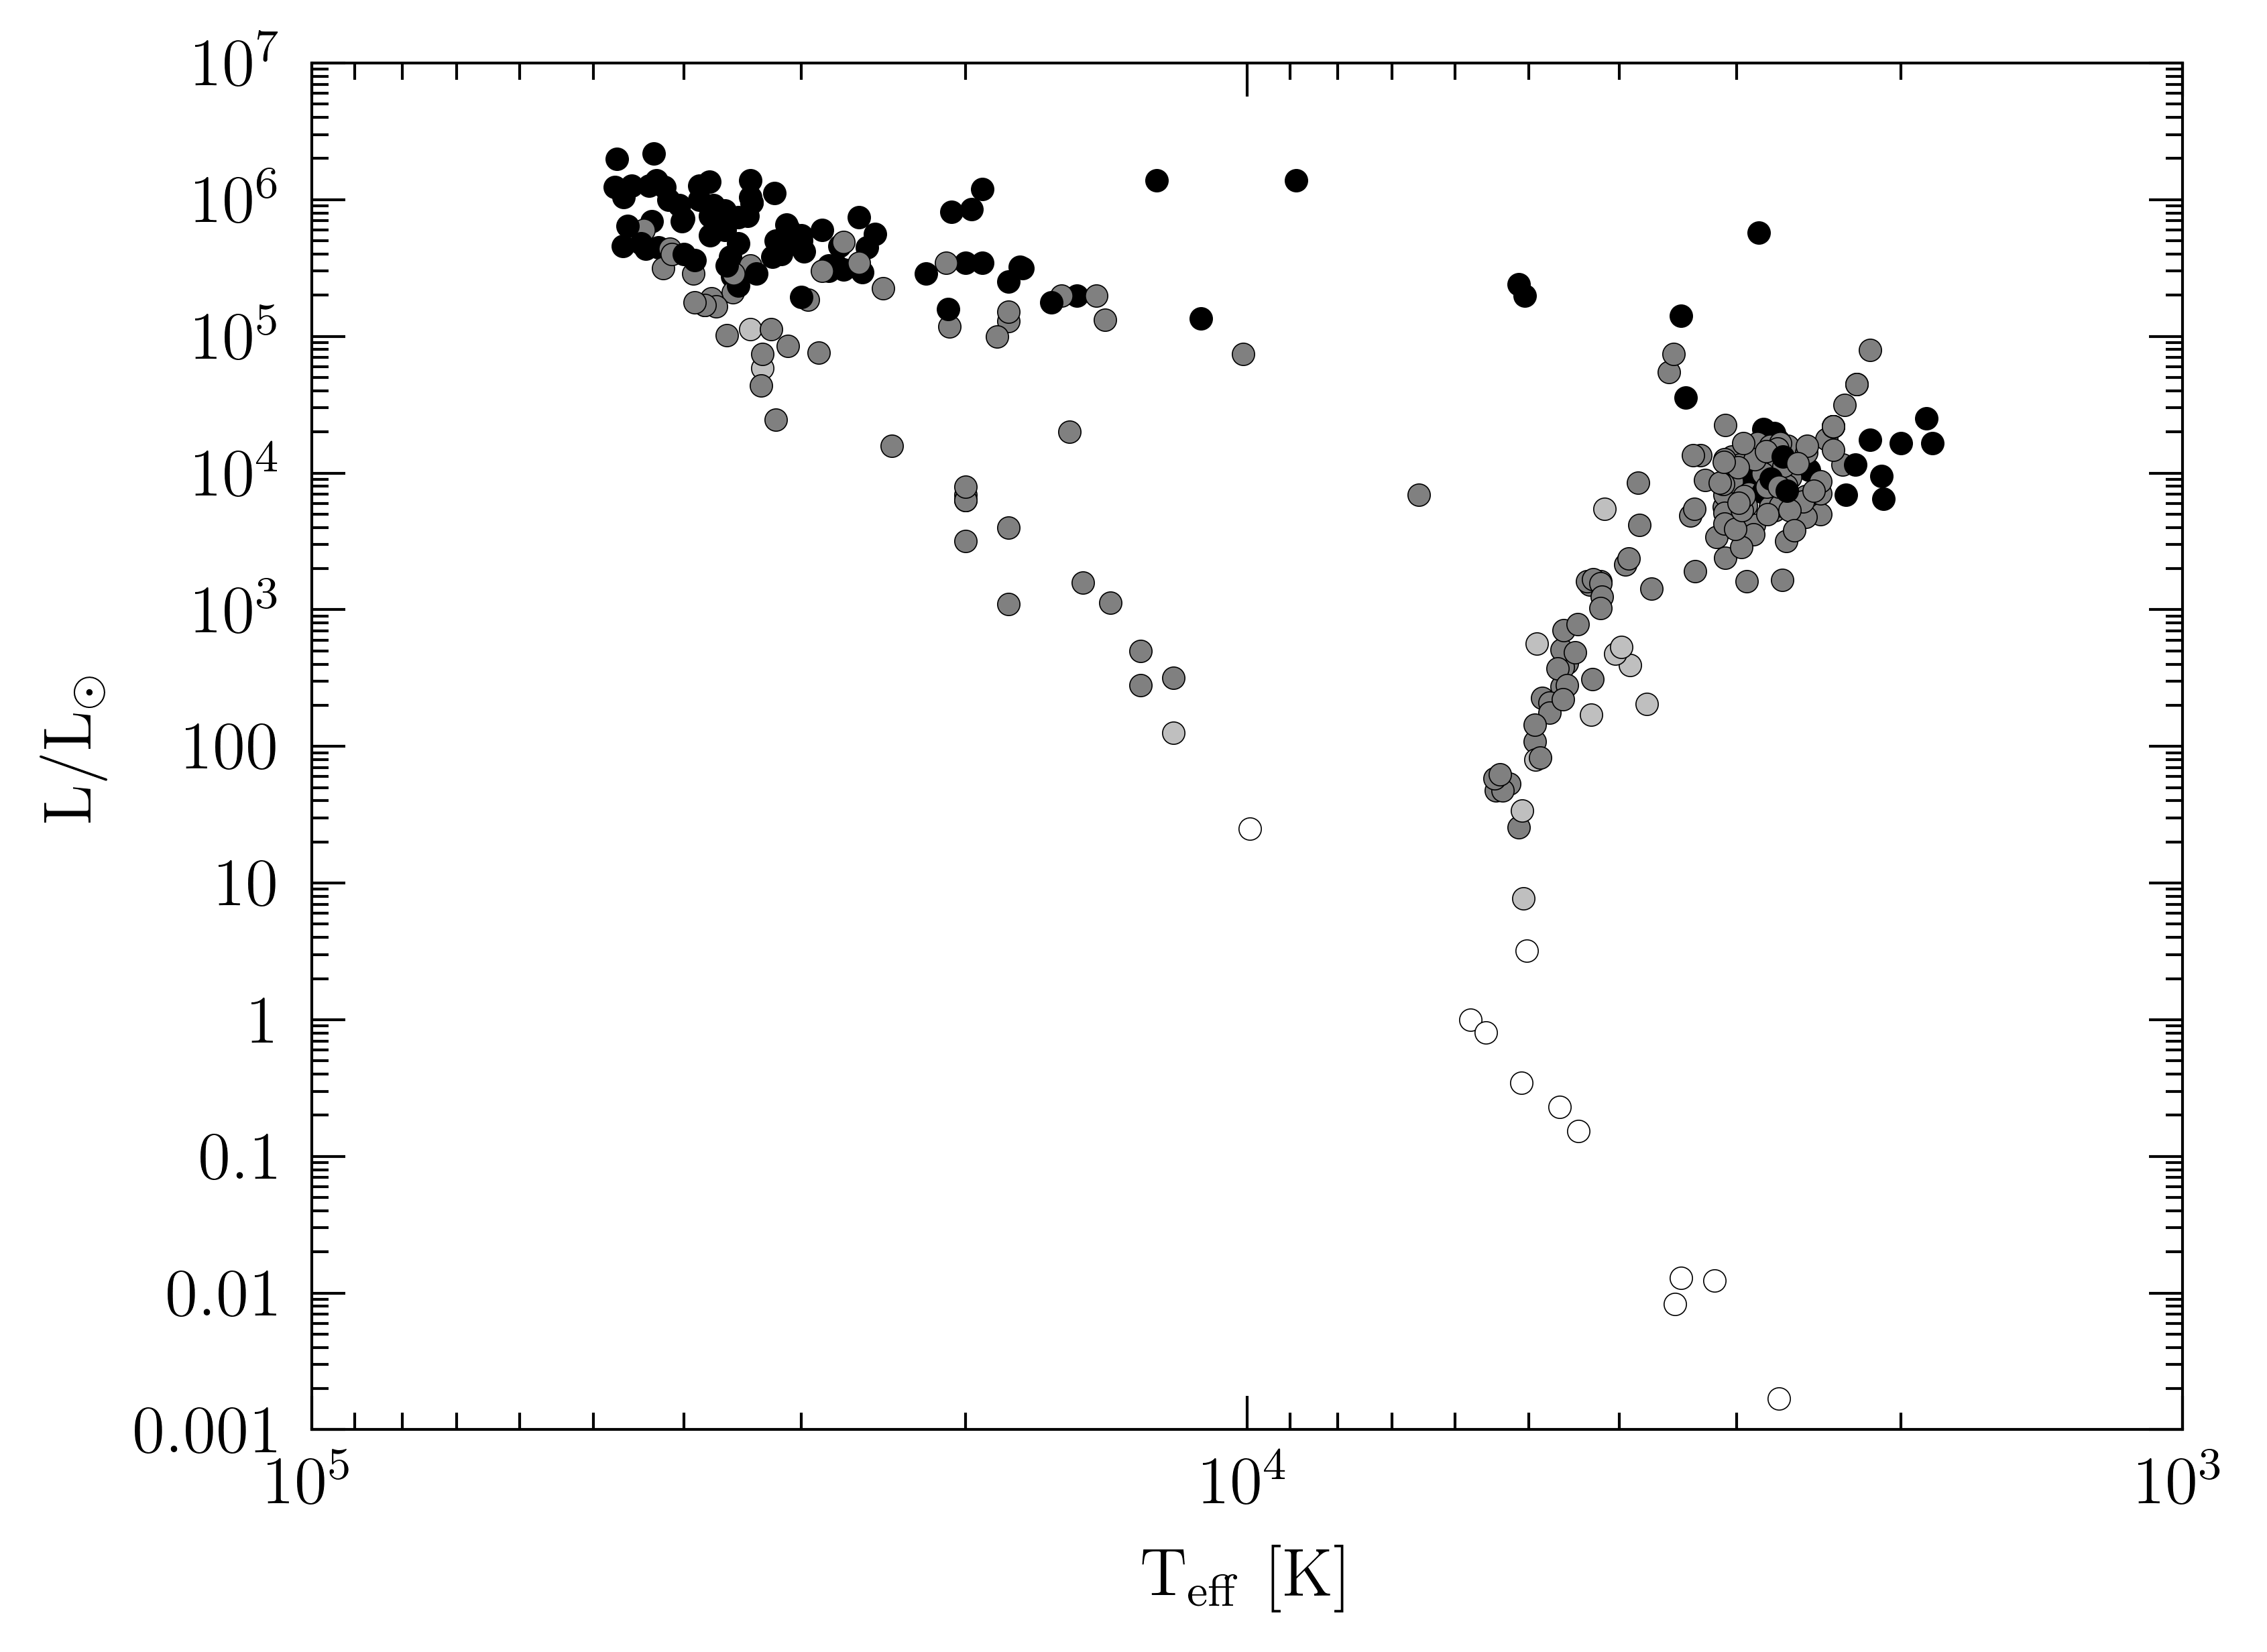

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(1.0e5,1000)
ax.set_xscale('log')
ax.set_xlabel(r'T$_{\rm eff}$ [K]',fontsize=axisFontSize)

ax.set_ylim(0.001,1.0e7)
ax.set_yscale('log')
ax.set_yticks([.001,.01,.1,1,10,100,1000,1.0e4,1.0e5,1.0e6,1.0e7])
ax.set_yticklabels(['0.001','0.01','0.1','1','10','100','10$^{3}$','10$^4$','10$^5$',
                   '10$^6$','10$^7$'])
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())

ax.set_ylabel(r'L/L$_{\odot}$',fontsize=axisFontSize)

for i in range(len(Teff)):
    ax.plot(Teff[i],L[i],'o',mfc=mCol[i],mec='black',mew=0.2,ms=4)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')